In [113]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import astropy.coordinates

# Lab 2:  Ground- and Space-Based Ozone Column Measurements 
In this laboratory exercise, the amount of ozone in an air column between the ground and the top  of  the  atmosphere  will  be  measured  using  an  ozone  spectrophotometer  and  then  analyzed  and  compared with satellite observations available on the web.  

In  Lab  1,  recall  that  a  spectrometer  consisting  of  a  light  source,  a  monochromator,  and  a  light detector was used to measure the amount of radiation absorbed at particular wavelengths by a sample of iodine. If we had so chosen, we could have measured the amount of iodine vapor in the sample vial using the Beer-Lambert Law if we knew the proportionality constant, $\alpha$, for gaseous $I_2$ in the following equation (e.g., Atkins handout, pg 464):

# $ \frac{I}{I_0} = e^{- \alpha * C * l} $
where
$I_0$  = Light intensity of a particular wavelength $\lambda$ before it passes through the sample

I  = Light intensity (at $\lambda$) remaining after passing through the sample

$\alpha$ = the molar absorption coefficient at $\lambda$ (in appropriate units for the equation used) 

[ C ] =  Concentration of species C 

L = Thickness of sample  

Using  similar  principles,  in  this  lab  you  will  measure  the  amount  of  light  at  several  different  wavelengths  absorbed  by  ozone  in  the  atmosphere  as  it  undergoes  an  electronic  transition.  In  this  case, the light source is the sun, the sample "vial" is the entire atmosphere, and the light detectors and  light  filters  are  contained  in  a  compact  hand-held  instrument  that  measures  the  amount  of  radiation absorbed by ozone at several different wavelengths. Because we are working in “the real world”, applying the Beer-Lambert Law is not quite as straight-forward as in a controlled laboratory setting. In this case, the amount of light from the sun entering at the top of the atmosphere ($I_o$) is not directly known. Furthermore, some amount of the incoming radiation, $I_o$, is not absorbed by ozone but  is  "scattered"  by  aerosol  particles  (Mie  scattering)  and  air  molecules  (Rayleigh  scattering)  and  therefore  does  not  make  it  to  the  detectors.  To  address  these  problems,  the  radiation  at  multiple  wavelengths that are absorbed by ozone and wavelengths that are NOT absorbed by ozone (but that are  scattered)  are  measured.    Using  the  measured  ratios  of  light  intensities  at  several  different  wavelengths,  the  amount  of  ozone  in  the  atmosphere  between  the  instrument  and  the  sun  can  be  calculated. 

## CALCULATIONS 
1.Data  from  the  Microtops  instrument  for  measurements  taken  by  the  182  class  this  year,  as  well  as  a  number  of  previous  measurements,  will  be  available  on  bcourses.  Measurements  taken  by  this  year's  class  will  be  in  a  text  file  that  was  output  directly  from  the  Microtops.

In [56]:
all_rows = np.loadtxt('chem182_lab2.txt', delimiter= ',', skiprows= 7, dtype= 'str')

2.Find the five measurements corresponding to your ID number. Although the instrument has already  calculated  the  total  column  ozone,  you  will  use  the  ratios  of  individual  pairs  of  wavelengths  as  on  page  45  of  the  manual  and  the  combination  of  three  wavelengths  as  on  page 54 to calculate the total column ozone yourself for your five measurements.  Since you will be using the same algorithm and "raw" data as the microprocessor in the MICROTOPS instrument, you should get the same values. Use a spreadsheet to calculate the following:

In [188]:
my_rows = all_rows[-7:]
category = all_rows[0]


for i in range(len(category)):
    if category[i] == 'DATE':
    #for j in range(len(my_rows)):
        date_str = my_rows[0][i]
        julian = julian_date(date_str)
        print(category[i],julian)

DATE 2458521.5


a. Calculate  secZ,  m,  h,  ν, μ  using  the  equations  from  the  manual  (p.  44-45).  See  the  lower part of the table in Appendix II below for values for these calculations for the measurements made in Philadelphia on March 29, 2006 at the Microtops factory.

In [173]:
def sunpos(date_str=None):
    """ Return (ra,dec) of the sun at the given Julian Date. 
    Parameters
    -----------
    jd: float, Julian Date, default=now
    Returns
    -------
    ra : float, right ascension in degrees
    dec: float, declination in degrees
    """
    format_str = '%m/%d/%Y'
    date_time = datetime.datetime.strptime(date_str, format_str)
    t = astropy.time.Time(date_time)
    julian = t.jd
    
    if julian: t = astropy.time.Time(julian,format='jd')
    else: t = astropy.time.Time(time.time(),format='unix')
    sun = astropy.coordinates.get_sun(time=t)
    return sun.ra.deg, sun.dec.deg

In [665]:
## Constants ##
R = 6371 #km mean earth radius 
r = np.float(my_rows[0][5])/1000 #0.095 km, altitude of ozone station above sea level in km
latitude = np.float(my_rows[0][3]) #37.867
v = (R + r)**2/ (R + h)**2 #factor for height of the ozone layer
h = 26 - 0.1 * latitude #height of ozone layer above sea level 
P0 = 1013.25 #mB standard pressure

#Z_predicted = 90 + sunpos(my_rows[0][1])[1] #degrees from  zenith


##FROM DOCUMENT
A1=2.945E+00
A2=1.097E+00
B1=1.024E-01
B2=9.330E-02
L1=7.206E-01
L2=8.826E-01

b. Calculate values for the total column ozone ($O3_{305.5-312.5}, O3_{312.5-320}$) for each of your
individual measurements based on the ratios of individual pairs of wavelengths using
the equation on pg 45 of the manual, the wavelength pairs noted in the subscripts
above, and the instrument calibration parameters.

In [698]:
def find_alpha(wavelength1, wavelength2):
    #alpha = (2.1349e19)*np.e**(-0.14052*wavelength)
    if (wavelength1, wavelength2) == (305.5, 312.5):
        alpha = A1
    elif (wavelength1, wavelength2) == (312.5, 320.5):
        alpha = A2
    return alpha

def find_beta(wavelength1, wavelength2):
    #beta = 16.407 - 0.085284*(wavelength) + 0.00011522 * (wavelength)**2
    if (wavelength1, wavelength2) == (305.5, 312.5):
        beta = B1
    elif (wavelength1, wavelength2) == (312.5, 320.5):
        beta = B2
    return beta

def find_L(wavelength1, wavelength2):
    if (wavelength1, wavelength2) == (305.5, 312.5):
        L = L1
    elif (wavelength1, wavelength2) == (312.5, 320.5):
        L = L2
    return L

def I1I2(wavelength1, wavelength2):
    if (wavelength1, wavelength2) == (305.5, 312.5):
        I1I2 = R305_312
        #I1I2 = np.array(sig305)/np.array(sig312)
    elif (wavelength1, wavelength2) == (312.5, 320.5):
        I1I2 = R312_320
        #I1I2 = np.array(sig312)/np.array(sig320)
    return I1I2

In [699]:
def total_ozone(wavelength1, wavelength2, mu, m, P):
    
    #alpha12 = alpha(wavelength1) - alpha(wavelength2) #the difference in ozone coefficients in channels 1 and 2
    #beta12 = beta(wavelength1) - beta(wavelength2) #the difference in air scattering coefficients in channels 1 and 2
    
    
    alpha = find_alpha(wavelength1, wavelength2)
    beta = find_beta(wavelength1, wavelength2)
    L = find_L(wavelength1, wavelength2)
    
    #I1 = #intensity of light before it passes through atmosphere
    #I2 = I2(wavelength1, wavelength2) #intensity of light after it passes through atmosphere
    
    omega = (1000 * (L - np.log(I1I2(wavelength1, wavelength2)) - beta * m*(P/P0))) / (alpha * mu)
    
    
    return omega

In [700]:
wavelength1 = 305.5
wavelength2 = 312.5
wavelength3 = 320.5

print('h = ', h, ', v = ', v, )

for i in range(len(my_rows)):
    print(i)
    P = np.float(my_rows[i][6]) 
    Z_actual = SZA[i] #zenith angle
    secZ = 1/ (np.cos(np.radians(Z_actual))) #The air mass is the secant of the zenith angle
    m = secZ - (0.0018167 * (secZ -1)) - (0.002875 * (secZ -1)**2) - (0.0008083*(secZ -1)**3)
    mu = 1/(np.sqrt(1 - (v * np.sin(np.radians(Z_actual))**2)))
    
    print ('secZ = ', secZ, ', m = ', m, ', mu = ', mu, ', Z = ', Z_actual)
    
    OZ312_320 = np.float(my_rows[i][19])
    OZ305_312 = np.float(my_rows[i][18])
    
    omega1 = total_ozone(wavelength1, wavelength2, mu, m, P)
    print('OMEGA1:  calculated = ', omega1[i], ', actual = ', OZ305_312, ', difference =', omega1[i] - OZ305_312)
    omega2 = total_ozone(wavelength2, wavelength3, mu, m, P)
    print('OMEGA2:  calculated = ', omega2[i], ', actual = ', OZ312_320, ', difference =', omega2[i] - OZ312_320)
    #OMEGA1.append(omega1[i])
    #OMEGA2.append(omega2[i])

h =  22.2133 , v =  0.9930926630657587
0
secZ =  1.9122472256312557 , m =  1.9075837503141635 , mu =  1.894939580573772 , Z =  58.47
OMEGA1:  calculated =  313.1983797801157 , actual =  313.3 , difference = -0.10162021988429615
OMEGA2:  calculated =  369.6375215113128 , actual =  369.5 , difference = 0.13752151131279788
1
secZ =  1.9138808554309426 , m =  1.9092025329938767 , mu =  1.8965182223675243 , Z =  58.5
OMEGA1:  calculated =  311.87785849911074 , actual =  311.9 , difference = -0.022141500889233612
OMEGA2:  calculated =  362.8983906091241 , actual =  362.8 , difference = 0.09839060912406694
2
secZ =  1.914971785383377 , m =  1.9102835329816503 , mu =  1.8975723756788765 , Z =  58.52
OMEGA1:  calculated =  314.79168256841945 , actual =  314.8 , difference = -0.008317431580564971
OMEGA2:  calculated =  292.90838592574534 , actual =  292.8 , difference = 0.10838592574532413
3
secZ =  1.916064193325401 , m =  1.9113659853569183 , mu =  1.8986279122555794 , Z =  58.54
OMEGA1:  calc

c. Also calculate values for the total column ozone using two pairs of wavelengths
simultaneously (305.5/312.5 and 312.5/320nm), the instrument calibration
parameters, and the equation on p. 54 of the manual. [Note that the right side of the
equation on p. 54 needs to be multiplied by 1000 for the units to work out.]

In [762]:
def corrected_ozone(OZ305_312,I1I2, OZ312_320, I2I3, m, P, mu):
    omega = 1000* ((L1 - np.log(I1I2)) - (L2 - np.log(I2I3)) - ((B1 - B2)* (m * (P/P0)))) / ((A1 - A2) *mu)
    #omega = 1000* (np.log((OZ305_312 * 1/I1I2) * (1/(OZ312_320 * 1/I2I3))) - ((B1 - B2)* (m * (P/P0)))) / ((A1 - A2) *mu)

    return omega

In [767]:
for i in range(len(my_rows)):
    I1I2 = R305_312[i]
    OZ305_312 = np.float(my_rows[i][18]) 
    I2I3 = R312_320[i]
    OZ312_320 = np.float(my_rows[i][19])
    P = np.float(my_rows[i][6]) 
    Z_actual = SZA[i] #zenith angle
    secZ = 1/ (np.cos(np.radians(Z_actual))) #The air mass is the secant of the zenith angle
    m = secZ - (0.0018167 * (secZ -1)) - (0.002875 * (secZ -1)**2) - (0.0008083*(secZ -1)**3)
    mu = 1/(np.sqrt(1 - (v * np.sin(np.radians(Z_actual))**2))) 
    OZONE = np.float(my_rows[i][20])
    
    omega = corrected_ozone(OZ305_312,I1I2, OZ312_320, I2I3, m, P, mu)
    print(i, 'CORRECTED OZONE:  calculated = ', omega, ', actual = ', OZONE, ', difference = ', omega - OZONE)
    #column_ozone.append(omega)
    #many_ozone.append(OZONE)

0 CORRECTED OZONE:  calculated =  279.69527454249504 , actual =  279.9 , difference =  -0.2047254575049351
1 CORRECTED OZONE:  calculated =  281.591319687052 , actual =  281.7 , difference =  -0.10868031294796765
2 CORRECTED OZONE:  calculated =  327.7819295473229 , actual =  327.9 , difference =  -0.11807045267710237
3 CORRECTED OZONE:  calculated =  329.11034744399785 , actual =  329.2 , difference =  -0.08965255600213595
4 CORRECTED OZONE:  calculated =  335.8134964841402 , actual =  336.0 , difference =  -0.18650351585978342
5 CORRECTED OZONE:  calculated =  329.205274771934 , actual =  329.4 , difference =  -0.1947252280659768
6 CORRECTED OZONE:  calculated =  309.7002214901899 , actual =  309.9 , difference =  -0.1997785098100735


d. Take the average and standard deviation of your 5 total column ozone measurements
that you calculated in item 2c above.

In [768]:
avg = np.mean(column_ozone)
std = np.std(column_ozone)

In [769]:
print('Calculated Column Ozone Measurement = ', avg, '+-', std)
print('Collected Column Ozone Measurement = ', np.mean(many_ozone), '+-', np.std(many_ozone))

Calculated Column Ozone Measurement =  313.27112342387596 +- 21.932360982320926
Collected Column Ozone Measurement =  313.42857142857144 +- 21.92856677524381


3.Compare the result from item 2d above with measurements from the OMI instrument on the
Aura satellite. At the following website you can enter a latitude, longitude, and date and
have a value for the overhead total column ozone returned on the screen:
##### On Feb 7, 2019 North America is in Green, which represents values between 250-325, and the collected data is well within that range, so our data checks out with NASA's data

4.Calculate an average and standard deviation for the total column ozone (the value calculated
for 2 pairs of wavelengths from pg 54 of the manual from the Microtops output data file) for
each day that ozone measurements are available in the text file – that is, for more than just
your own scans. Using the same website as above, compare each of these measurements to
the satellite data.

In [1065]:
for i in range(len(category)):
    if category[i] == 'R312_320':
        for j in range(len(all_rows[1:])):
            value = all_rows[j+1][i]
            #if value == '02/07/2019':
            #print(j+1, i, category[i],value)

In [871]:
seventh = all_rows[155:210]
fifth = all_rows[1:154]

In [882]:
column_ozone_fifth = []
calculated_column_ozone_fifth = []
for i in range(len(fifth)):
    I1I2 = np.float(fifth[i][14])
    OZ305_312 = np.float(fifth[i][18]) 
    I2I3 = np.float(fifth[i][15])
    OZ312_320 = np.float(fifth[i][19])
    P = np.float(fifth[i][6]) 
    Z_actual = np.float(fifth[i][7]) #zenith angle
    secZ = 1/ (np.cos(np.radians(Z_actual))) #The air mass is the secant of the zenith angle
    m = secZ - (0.0018167 * (secZ -1)) - (0.002875 * (secZ -1)**2) - (0.0008083*(secZ -1)**3)
    mu = 1/(np.sqrt(1 - (v * np.sin(np.radians(Z_actual))**2))) 
    OZONE = np.float(fifth[i][20])
    
    omega = corrected_ozone(OZ305_312,I1I2, OZ312_320, I2I3, m, P, mu)
    #print(i, 'CORRECTED OZONE:  calculated = ', omega, ', actual = ', OZONE, ', difference = ', omega - OZONE)
    column_ozone_fifth.append(omega)
    calculated_column_ozone_fifth.append(OZONE)

In [886]:
column_ozone_seventh = []
calculated_column_ozone_seventh = []
for i in range(len(seventh)):
    I1I2 = np.float(seventh[i][14])
    OZ305_312 = np.float(seventh[i][18]) 
    I2I3 = np.float(seventh[i][15])
    OZ312_320 = np.float(seventh[i][19])
    P = np.float(seventh[i][6]) 
    Z_actual = np.float(seventh[i][7]) #zenith angle
    secZ = 1/ (np.cos(np.radians(Z_actual))) #The air mass is the secant of the zenith angle
    m = secZ - (0.0018167 * (secZ -1)) - (0.002875 * (secZ -1)**2) - (0.0008083*(secZ -1)**3)
    mu = 1/(np.sqrt(1 - (v * np.sin(np.radians(Z_actual))**2))) 
    OZONE = np.float(seventh[i][20])
    
    omega = corrected_ozone(OZ305_312,I1I2, OZ312_320, I2I3, m, P, mu)
    #print(i, 'CORRECTED OZONE:  calculated = ', omega, ', actual = ', OZONE, ', difference = ', omega - OZONE)
    column_ozone_seventh.append(omega)
    calculated_column_ozone_seventh.append(OZONE)

In [887]:
print('2/5 Calculated Column Ozone Measurement = ', np.mean(column_ozone_fifth), '+-', np.std(column_ozone_fifth))
#print('2/5 Collected Column Ozone Measurement = ', np.mean(calculated_column_ozone_fifth), '+-', np.std(calculated_column_ozone_fifth))
print('2/7 Calculated Column Ozone Measurement = ', np.mean(column_ozone_seventh), '+-', np.std(column_ozone_seventh))


2/5 Calculated Column Ozone Measurement =  301.290970335896 +- 14.581190427833036
2/7 Calculated Column Ozone Measurement =  307.0451838298857 +- 24.074529796983366


In [989]:
def corrected_ozone(A1, A2, B1, B2, L1, L2, I1I2, I2I3, m, P, mu):
    omega = 1000* ((L1 - np.log(I1I2)) - (L2 - np.log(I2I3)) - ((B1 - B2)* (m * (P/P0)))) / ((A1 - A2) *mu)
    return omega

def calculate_mean_ozone(array, A1, A2, B1, B2, L1, L2):
    '''This function will take an array with data from a single date and return the average corrected ozone measurement.
    The 0th row should be the categories '''
    date = array[0][1]
    
    
    ## Constants that will change with every date ##
    R = 6371 #km mean earth radius 
    r = np.float(array[0][5])/1000 #0.095 km, altitude of ozone station above sea level in km
    latitude = np.float(array[0][3]) #37.867
    h = 26 - 0.1 * latitude #height of ozone layer above sea level 
    v = (R + r)**2/ (R + h)**2 #factor for height of the ozone layer
    P0 = 1013.25 #mB standard pressure

    column_ozone = []
    calculated_column_ozone = []
    
    for i in range(len(array)):
        ## Constants that will change with every line ##
        I1I2 = np.float(array[i][14])
        OZ305_312 = np.float(array[i][18]) 
        I2I3 = np.float(array[i][15])
        OZ312_320 = np.float(array[i][19])
        P = np.float(array[i][6]) 
        Z_actual = np.float(array[i][7]) #zenith angle
        secZ = 1/ (np.cos(np.radians(Z_actual))) #The air mass is the secant of the zenith angle
        m = secZ - (0.0018167 * (secZ -1)) - (0.002875 * (secZ -1)**2) - (0.0008083*(secZ -1)**3)
        mu = 1/(np.sqrt(1 - (v * np.sin(np.radians(Z_actual))**2))) 
        OZONE = np.float(array[i][20])
        
        #Calculate
        omega = corrected_ozone(A1, A2, B1, B2, L1, L2, I1I2, I2I3, m, P, mu)
        
        column_ozone.append(omega)
        calculated_column_ozone.append(OZONE)
    
    avg = np.mean(column_ozone)
    std = np.std(column_ozone)
    return(date, avg, std)
    

In [990]:
#All_rows
##FROM DOCUMENT
A1=2.945E+00
A2=1.097E+00
B1=1.024E-01
B2=9.330E-02
L1=7.206E-01
L2=8.826E-01

feb_5_2019 = all_rows[1:154]
feb_7_2019 = all_rows[155:210]

feb_5_2019_ozone = calculate_mean_ozone(feb_5_2019, A1, A2, B1, B2, L1, L2)
feb_7_2019_ozone = calculate_mean_ozone(feb_7_2019, A1, A2, B1, B2, L1, L2)

print(feb_5_2019_ozone)
print(feb_7_2019_ozone)

('02/05/2019', 301.290970335896, 14.581190427833036)
('02/07/2019', 307.0451838298857, 24.074529796983366)


In [ ]:
previous_data = np.loadtxt('/Users/CEE/Downloads/Lab2_Previousdata.csv', delimiter = ',', dtype = 'str')

In [1066]:
category_previous = previous_data[0]

for i in range(len(category_previous)):
    if category_previous[i] == 'DATE':
        for j in range(len(previous_data[1:])):
            value = previous_data[j][i]
            #if value == '2/11/2008':
            #    print(j, i, category_previous[i],value)
            if previous_data[j][i] != previous_data[j+1][i]:
                #print(previous_data[j][i], j)

SyntaxError: unexpected EOF while parsing (<ipython-input-1066-df0c61548f4c>, line 10)

In [949]:
march_29_2006 = previous_data[1:30]
jan_16_2008 = previous_data[31:40]
jan_17_2008 = previous_data[41:46]
jan_28_2008 = previous_data[47:51]
feb_6_2008 = previous_data[52:77]
feb_7_2008 = previous_data[78:158]
feb_8_2008 = previous_data[159:198]
feb_11_2008 = previous_data[199:208]
march_20_2008 = previous_data[209:219]
april_2_2008 = previous_data[220:232]
april_3_2008 = previous_data[233:241]
april_11_2008 = previous_data[242:253]
april_23_2008 = previous_data[254:266]
may_14_2008 = previous_data[267:276]
may_15_2008 = previous_data[277:286]
may_30_2008 = previous_data[287:296]
june_7_2008 = previous_data[297:306]
june_19_2008 = previous_data[307:316]
july_14_2008 = previous_data[317:326]
july_18_2008 = previous_data[327:338]
sept_23_2008 =previous_data[339:347]
oct_16_2008 = previous_data[348:358]
nov_13_2008 =previous_data[359:370]
dec_8_2008=previous_data[371:379]
jan_30_2009 =previous_data[380:388]
feb_5_2010=previous_data[389:400]
feb_9_2010 =previous_data[401:494]
feb_10_2010 = previous_data[492:500]
feb_16_2010 = previous_data[501:545]
feb_1_2011 = previous_data[546:653]
feb_2_2011 = previous_data[654:698]
feb_8_2011 = previous_data[699:714]
feb_2_2012 = previous_data[715:846]
feb_3_2012 =previous_data[847:880]
feb_9_2012 =previous_data[881:916]
feb_4_2013 =previous_data[917:921]
feb_6_2013 = previous_data[922:972]
feb_11_2013 = previous_data[973:1004]
feb_12_2013 = previous_data[1005:1118]
feb_15_2013 =previous_data[1119:1129]
feb_28_2013=previous_data[1130:1135]
feb_3_2014=previous_data[1136:1140]
feb_11_2014=previous_data[1141:1197]
feb_13_2014=previous_data[1198:1212]
feb_19_2014=previous_data[1213:1230]
feb_20_2014=previous_data[1231:1238]
feb_24_2014=previous_data[1239:1250]
feb_3_2015=previous_data[1251:1293]
feb_10_2015=previous_data[1294:1403]
feb_11_2015=previous_data[1404:1410]
feb_12_2015=previous_data[1411:1442]
feb_24_2015=previous_data[1443:1451]
feb_1_2016=previous_data[1452:1454]
feb_2_2016=previous_data[1455:1461]
feb_5_2016=previous_data[1462:1542]
feb_8_2016=previous_data[1543:1554]
feb_9_2016=previous_data[1555:1640]
feb_16_2016=previous_data[1641:1649]
feb_23_2016=previous_data[1650:1662]
jan_30_2017=previous_data[1663:1668]
jan_31_2017=previous_data[1669:1679]
feb_23_2017=previous_data[1680:1786]
feb_24_2017=previous_data[1787:1810]
jan_30_2018=previous_data[1811:1936]
feb_6_2018=previous_data[1937:1989]

In [953]:
dates1 = [march_29_2006, jan_16_2008, jan_17_2008, jan_28_2008 , feb_6_2008, feb_7_2008 , feb_8_2008, feb_11_2008 ,march_20_2008, april_2_2008, april_3_2008, april_11_2008, april_23_2008, may_14_2008, may_15_2008, may_30_2008, june_7_2008,june_19_2008, july_14_2008]
dates2 = [july_18_2008, sept_23_2008, oct_16_2008, nov_13_2008 ,dec_8_2008, jan_30_2009, feb_5_2010, feb_9_2010, feb_10_2010, feb_16_2010, feb_1_2011, feb_2_2011 ,feb_8_2011, feb_2_2012, feb_3_2012, feb_9_2012, feb_4_2013, feb_6_2013, feb_11_2013, feb_12_2013 ,feb_15_2013, feb_28_2013, feb_3_2014, feb_11_2014, feb_13_2014, feb_19_2014, feb_20_2014, feb_24_2014, feb_3_2015, feb_10_2015, feb_11_2015, feb_12_2015, feb_24_2015, feb_1_2016, feb_2_2016, feb_5_2016, feb_8_2016, feb_9_2016, feb_16_2016, feb_23_2016, jan_30_2017, jan_31_2017 ,feb_23_2017, feb_24_2017, jan_30_2018, feb_6_2018]


In [957]:
len(dates1)+len(dates2)

65

In [1093]:
calculated_ozone_avg = []

#MICROTOPS CONSTANTS
A1=2.923E+00
A2=1.093E+00
B1=1.011E-01
B2=9.070E-02
L1=7.177E-01
L2=9.165E-01

for i in range(len(dates1)):
    ozone = (calculate_mean_ozone(dates1[i], A1, A2, B1, B2, L1, L2))
    calculated_ozone_avg.append(ozone)
             
#MICROTOPS WAS RE-CALIBRATED at Mauna Loa, HAWAII after 7/18/2008.
A1=2.945E+00
A2=1.097E+00
B1=1.024E-01
B2=9.330E-02
L1=7.206E-01
L2=8.826E-01   
for i in range(len(dates2)):
    ozone = (calculate_mean_ozone(dates2[i], A1, A2, B1, B2, L1, L2))
    calculated_ozone_avg.append(ozone)
             
our_data = [feb_5_2019, feb_7_2019]
             
for i in range(len(our_data)):
    ozone = calculate_mean_ozone(our_data[i], A1, A2, B1, B2, L1, L2)
    calculated_ozone_avg.append(ozone)

In [1094]:
calculated_ozone_avg

[('3/29/2006', 400.45796296853814, 9.70663451535891),
 ('1/16/2008', 316.7822532392829, 4.4570521267911625),
 ('1/17/2008', 302.5504460176556, 0.8163420081589363),
 ('1/28/2008', 326.88889791110444, 1.58831494826211),
 ('2/6/2008', 289.2733841674759, 52.69017681851586),
 ('2/7/2008', 281.67167146079726, 8.445640152467853),
 ('2/8/2008', 278.2803966504932, 6.102053333192699),
 ('2/11/2008', 277.825293476034, 2.051263416371161),
 ('3/20/2008', 295.8961796507796, 1.2366601342265808),
 ('4/2/2008', 350.11589667101833, 14.3027087431728),
 ('4/3/2008', 333.42444333100076, 1.9846728549131267),
 ('4/11/2008', 308.72147428924404, 8.646161161779327),
 ('4/23/2008', 313.1198998894215, 9.010827055068733),
 ('5/14/2008', 265.62403824105206, 4.608447078898469),
 ('5/15/2008', 272.6813904295841, 2.7019927744482737),
 ('5/30/2008', 311.46049328038094, 2.8394282512693003),
 ('6/7/2008', 313.54097058974037, 2.333804171759218),
 ('6/19/2008', 283.6266137601377, 2.7832527086654353),
 ('7/14/2008', 276.407

In [1162]:
avgs = []
stds = []
dates = []
for i in range(len(calculated_ozone_avg)):
    std = calculated_ozone_avg[i][2]
    if std < 15:
        stds.append(std)
    
        avg = calculated_ozone_avg[i][1]
        date = calculated_ozone_avg[i][0]
    
        avgs.append(avg)
        dates.append(date)

In [1163]:
new_dates = []
for i in dates:
    format_str = '%m/%d/%Y'
    date = datetime.datetime.strptime(i, format_str)
    new_dates.append(date)

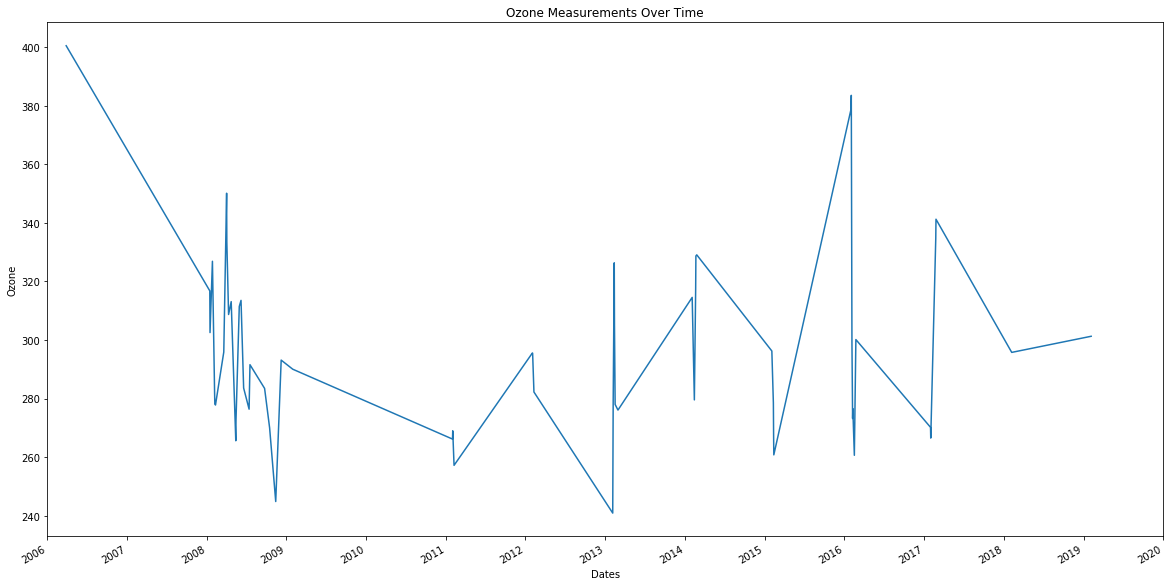

In [1164]:
fig, ax = plt.subplots()
plt.plot(new_dates, avgs)
fig = plt.gcf()
fig.set_size_inches(20, 10.5)
plt.xlabel('Dates')
plt.ylabel('Ozone')
plt.title('Ozone Measurements Over Time')

import matplotlib.dates as mdates
years = mdates.YearLocator() 
ax.xaxis.set_major_locator(years)

datemin = np.datetime64(new_dates[0], 'Y')
datemax = np.datetime64(new_dates[-1], 'Y') + np.timedelta64(1, 'Y')

ax.set_xlim(datemin, datemax)
fig.autofmt_xdate()
plt.show()